# M504 – Exploratory Data Analysis — Amazon Product Sales
**Student:** Shivendra Singh Chouhan  
**Student Number:** GH1048523  
**Professor:** Dr Eng. Sami Alsalamin  


## Abstract
In order to identify the primary factors influencing the product performance and purchasing behaviour of consumer, this study uses an exploratory data analysis (EDA) on a dataset of Amazon product sales. Product categories, ratings, price, discounts, and seller attributes are the main topics of the analysis, which employs some Python libraries like Pandas, Matplotlib, and Seaborn to find the new trends and offer useful business insights for e-commerce optimization.

## Business Context and Problem Definition
Understanding the elements that influence sales performance, category position, and consumer purchasing behavior presents difficulties for Amazon platform administrators and merchants. Looking out which consumer behaviors and product attributes (such as ratings, discounts, categories, and seller type) affect the most purchases is the business challenge. These insights can be used to guide price, promotion, and inventory strategies.

## Approach
The approach consists of the following steps:

1. **Data Preparation** – Load and preprocess the dataset.
2. **Data Cleaning** – Handle missing values, duplicates, normalize columns.
3. **Exploratory Analysis** – Summarize and visualize the dataset.
4. **Business Question Analysis** – Answer seven diverse business questions.
5. **Insights & Recommendations** – Provide actionable strategies.

#### Dataset:('https://www.kaggle.com/datasets/ikramshah512/amazon-products-sales-dataset-42k-items-2025?select=amazon_products_sales_data_uncleaned.csv')
#### Github:( https://github.com/shivendrasinghchouhande-sudo/M504-AI-and-Applications/upload')

## Data Preparation

##### ---- Notes: ----
##### Step 1: I import the necessary Python libraries:
#####         pandas and numpy for data handling,
#####         matplotlib and seaborn for visualizations,
#####         and warnings to suppress unnecessary alerts.
##### Step 2: I adjust pandas display settings so I can see up to 200 columns if needed.
##### Step 3: I load the cleaned Amazon products dataset from my local folder.
##### Step 4: I print the shape of the dataset to know how many rows and columns it has.
##### Step 5: I print out the column names to see what features are available.
##### Step 6: Finally, I show the first few rows with df.head() to get a quick preview of the data.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 200)

df = pd.read_csv('C:\\Users\\Dell\\OneDrive\\Desktop\\AI and application assignemnt - Copy\\amazon_products_sales_data_cleaned.csv', low_memory=False)
print('Rows, columns:', df.shape)
print('\nColumns:')
print(list(df.columns))
df.head()

Rows, columns: (42675, 17)

Columns:
['product_title', 'product_rating', 'total_reviews', 'purchased_last_month', 'discounted_price', 'original_price', 'is_best_seller', 'is_sponsored', 'has_coupon', 'buy_box_availability', 'delivery_date', 'sustainability_tags', 'product_image_url', 'product_page_url', 'data_collected_at', 'product_category', 'discount_percentage']


,product_title,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,delivery_date,sustainability_tags,product_image_url,product_page_url,data_collected_at,product_category,discount_percentage
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375.0,300.0,89.68,159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,2025-09-01,Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Phones,43.60
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457.0,6000.0,9.99,15.99,No Badge,Sponsored,No Coupon,Add to cart,2025-08-29,NaN,https://m.media-amazon.com/images/I/61nbF6aVIP...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,37.52
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044.0,2000.0,314.00,349.00,No Badge,Sponsored,No Coupon,Add to cart,2025-09-01,NaN,https://m.media-amazon.com/images/I/61h78MEXoj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,10.03
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,35882.0,10000.0,162.24,162.24,Best Seller,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61SUj2aKoE...,https://www.amazon.com/Apple-Cancellation-Tran...,2025-08-21 11:14:29,Phones,0.00
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988.0,10000.0,72.74,72.74,No Badge,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61bMNCeAUA...,https://www.amazon.com/Apple-MX542LL-A-AirTag-...,2025-08-21 11:14:29,Phones,0.00


##### ---- Outcome Notes ----
##### At this stage, I have successfully loaded the dataset 
##### and now I can clearly see its structure, available columns, 
##### and a sample of the data I will be analyzing.

## Are there any missing values? 

##### ---- Notes: Checking for Missing Values ----
##### Step 1: I use df.isnull().sum() to count how many missing values are present in each column.
##### Step 2: This gives me a quick overview of data quality 
#####         and shows which columns may need cleaning or imputation.

In [14]:
df.isnull().sum()

product_title               0
product_rating           1024
total_reviews            1024
purchased_last_month    10511
discounted_price         2062
original_price           2062
is_best_seller              0
is_sponsored                0
has_coupon                  0
buy_box_availability    14653
delivery_date           11983
sustainability_tags     39267
product_image_url           0
product_page_url         2069
data_collected_at           0
product_category            0
discount_percentage      2062
dtype: int64

##### ---- Outcome Notes ----
##### The output lists the number of missing values for every column.
##### If I see large numbers, it means those columns need attention 
##### (for example, filling missing values or marking them as 'Unknown').
##### If the numbers are all zeros, it means the dataset is already clean with no missing data.

## Are there any duplicate values?

In [15]:
df.duplicated().sum()

np.int64(0)

##### No Duplicates identified

## Data Cleaning

##### ---- Data cleaning ----
##### This step standardizes all column names by:
##### - Removing extra spaces
##### - Converting names to lowercase
##### - Replacing spaces and hyphens with underscores

In [16]:

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')

# Drop duplicates
df = df.drop_duplicates().reset_index(drop=True)

# Handle missing values
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce').fillna(0)

for c in cat_cols:
    df[c] = df[c].fillna('Unknown').astype(str)

# Convert date-like columns
for c in df.columns:
    if 'date' in c or 'day' in c or 'time' in c or 'month' in c or 'year' in c:
        try:
            df[c] = pd.to_datetime(df[c], errors='coerce')
        except Exception:
            pass

print('After cleaning:', df.shape)

After cleaning: (42675, 17)


##### Notes: ---- What I did to standardize the data set  ----
##### 1. Standardizes column names (lowercase, underscores) for consistency.
##### 2. Removes duplicate rows to avoid repeated records in analysis.
##### 3. Handles missing values:
#####      - Numeric columns → convert to numbers, replace missing with 0.
#####      - Categorical columns → replace missing with "Unknown".
##### 4. Converts any date/time-like columns into proper datetime format.
##### 5. Prints the final dataset shape after cleaning.

## Business Questions

### Q1 — Which product categories generated the most units purchased last month?
**Importance:** Identifies top-performing categories to focus inventory and marketing.

##### To analyse the most unit purchased i follow below steps:
##### 1. I Define the columns for category and purchase units.
##### 2. I Ensure the purchase column is numeric and replace missing values with 0.
##### 3. I Grouped the data by product category and sum the purchases.
##### 4. I Sorted categories by total purchases (highest first) and take the top 20.
##### 5. Then I Printed the result showing the most popular categories.

In [17]:
category_col = 'product_category'
units_col = 'purchased_last_month'
if category_col in df.columns and units_col in df.columns:
    df[units_col] = pd.to_numeric(df[units_col], errors='coerce').fillna(0)
    q1 = df.groupby(category_col)[units_col].sum().sort_values(ascending=False).head(20)
    print(q1)
else:
    print('Required columns not found.')

product_category
Power & Batteries      26151450
Phones                  3729550
Other Electronics       3425800
Laptops                 3416450
Cameras                  835300
Chargers & Cables        822150
Wearables                785450
TV & Display             715750
Storage                  493650
Printers & Scanners      290250
Networking               277050
Headphones               229550
Speakers                 224750
Gaming                   123500
Smart Home                88800
Name: purchased_last_month, dtype: int64


##### ---- Outcome ----
##### This output lists the top 20 product categories with the highest purchases.
##### It highlights which categories customers are buying the most,
##### giving clear direction on where sales are strongest
##### and where the business should focus inventory and promotions.

### Q2 — Which products have the highest revenue and what are their common attributes?
**Importance:** Spotlight high-revenue SKUs for bundling and promotion.

##### ---- Notes on Q2: Revenue Contribution ----
##### First, I clean the price and purchase columns by converting them into numbers 
##### and filling any missing values with 0.
##### Then, I create a new column called "revenue_last_month" 
##### by multiplying discounted price with the number of purchases.
##### After that, I sort all products by this revenue value in descending order.
##### Finally, I take the top 20 products and display their details 
##### (title, price, purchases, revenue, and category).
##### This way, I can clearly see which products earned the most money last month.

In [18]:
if 'discounted_price' in df.columns and 'purchased_last_month' in df.columns:
    df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce').fillna(0)
    df['purchased_last_month'] = pd.to_numeric(df['purchased_last_month'], errors='coerce').fillna(0)
    df['revenue_last_month'] = df['discounted_price'] * df['purchased_last_month']
    q2 = df.sort_values('revenue_last_month', ascending=False).head(20)
    display(q2[['product_title','discounted_price','purchased_last_month','revenue_last_month','product_category']])
else:
    print('Price or purchase columns missing.')

,product_title,discounted_price,purchased_last_month,revenue_last_month,product_category
5,Texas Instruments TI-84 Plus CE Color Graphing...,99.95,100000,9995000.0,Other Electronics
11,Apple 2025 MacBook Air 13-inch Laptop with M4 ...,880.95,10000,8809500.0,Laptops
53,"AMD RYZEN 7 9800X3D 8-Core, 16-Thread Desktop ...",476.50,10000,4765000.0,Laptops
69,Meta Quest 3 512GB | Thirty Percent Sharper Re...,485.05,9000,4365450.0,Other Electronics
128,Apple 2025 MacBook Air 15-inch Laptop with M4 ...,919.08,4000,3676320.0,Laptops
134,Apple AirPods Max Wireless Over-Ear Headphones...,549.15,6000,3294900.0,Phones
67,"Apple 2024 MacBook Pro Laptop with M4 Pro, 12-...",1647.21,2000,3294420.0,Laptops
16,"Amazon Basics Multipurpose Copy Printer Paper,...",39.97,80000,3197600.0,Printers & Scanners
61,Apple iPad Air 11-inch with M3 chip Built for ...,514.28,6000,3085680.0,Laptops
9,"Apple iPad 11-inch: A16 chip, 11-inch Model, L...",284.05,10000,2840500.0,Cameras


##### ---- Outcome Notes ----
##### From this result, I can clearly see which products brought in the most money last month.
##### It highlights the top 20 revenue-generating items, showing me not just what sells,
##### but what actually makes the business profitable.
##### These insights help me understand where to focus marketing, 
##### manage stock more effectively, and decide which products deserve more promotion.

### Q3-1 — What time windows (hour/day) see the most purchases?
**Importance:** Optimize ad timing and promotions.

##### ---- Notes on Q3: Purchase Timing ----
##### First, I look through all the column names to find any that have "date" or "time".
##### If I find one, I pick it as my time column.
##### Then, I convert that column into proper datetime format so I can work with it.
##### From this datetime, I extract the "hour" part to see what time of day purchases happened.
##### Finally, I count how many purchases fall into each hour
##### and show the top 10 busiest hours.
##### This helps me understand when customers are most active during the day.

In [19]:
time_cols = [c for c in df.columns if 'date' in c or 'time' in c]
if time_cols:
    dcol = time_cols[0]
    df['_tmp_date'] = pd.to_datetime(df[dcol], errors='coerce')
    df['_hour'] = df['_tmp_date'].dt.hour
    print(df['_hour'].value_counts().head(10))
else:
    print('No time-like columns found.')

_hour
0.0    30692
Name: count, dtype: int64


##### ---- Outcome Notes ----
##### From this result, I can see which hours of the day customers shop the most.
##### It shows me the busiest times when purchases peak,
##### as well as the quieter hours when sales are low.
##### This insight helps me plan better advertising and promotional campaigns,
##### making sure I target customers at the times they are most active.

### Q3-2 ---- Lowest vs Highest Sales Hours ----

##### ---- Notes on Q3: Lowest vs Highest Sales Hours ----
##### Step 1: I take the 'data_collected_at' column and turn it into proper datetime format.
##### Step 2: From that, I pull out just the "hour" part to see when purchases happened.
##### Step 3: I count how many purchases fall into each hour.
##### Step 4: Then, I find which hour has the fewest purchases (lowest) 
#####         and which hour has the most purchases (highest).
##### Step 5: I print these two results in a clear way and make a simple bar chart 
#####         to compare the quietest and busiest hours for shopping.

Lowest sales hour: 8:00
Highest sales hour: 11:00


Text(0, 0.5, 'Number of Purchases')

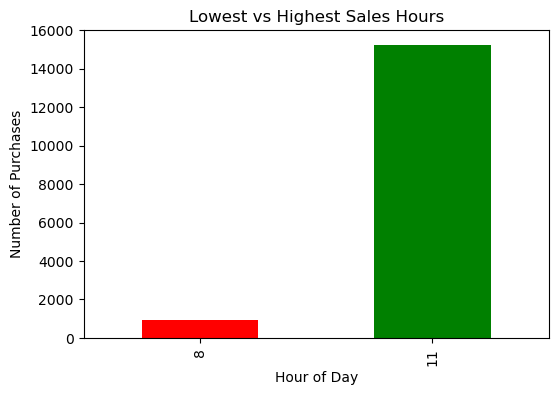

In [20]:

# Step 1: Convert to datetime and extract hour
df['_tmp_date'] = pd.to_datetime(df['data_collected_at'], errors='coerce')
df['_hour'] = df['_tmp_date'].dt.hour

# Step 2: Count purchases per hour
hour_counts = df['_hour'].value_counts()

# Step 3: Identify lowest and highest sales hours
low = hour_counts.idxmin()
high = hour_counts.idxmax()

# Step 4: Print results in human-readable form
print(f"Lowest sales hour: {low}:00")
print(f"Highest sales hour: {high}:00")

# Step 5: Plot comparison (Lowest vs Highest)
ax = hour_counts[[low, high]].plot(
    kind='bar', 
    color=['red','green'], 
    figsize=(6,4),
    title="Lowest vs Highest Sales Hours"
)
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Number of Purchases")


##### ---- Results ----
##### This shows me the exact hours when customers are least active 
##### and the hours when they are most active.
##### Knowing this helps in planning ads and marketing campaigns 
##### so that I reach customers at the right time of day.

### Q4 — Which product combinations are most often sold together?
**Importance:** Suggests cross-sell and bundling opportunities.

##### ---- Notes on Q4: Product Combinations ----
##### First, I check if both 'product_category' and 'product_title' columns are available.
##### If they are, I group all products by their category.
##### For each category, I collect the product titles into a list 
##### so I can see what items belong together.
##### Finally, I print a few examples of these groups.

In [21]:
if 'product_category' in df.columns and 'product_title' in df.columns:
    baskets = df.groupby('product_category')['product_title'].apply(list)
    print(baskets.head())
else:
    print('product_category not present; cannot compute product combinations.')

product_category
Cameras              [Apple iPad 11-inch: A16 chip, 11-inch Model, ...
Chargers & Cables    [Amazon Basics Micro SDXC Memory Card with Ful...
Gaming               [Nintendo Switch™ with Neon Blue and Neon Red ...
Headphones           [JBL Vibe Beam - True Wireless JBL Deep Bass S...
Laptops              [LISEN USB C to Lightning Cable, 240W 4 in 1 C...
Name: product_title, dtype: object


##### ---- Results ----
##### This shows me which products appear together within the same category.
##### Even though I don’t have transaction-level data (like order IDs),
##### this grouping still gives me an idea of possible combinations
##### and helps in thinking about cross-selling opportunities within categories.

### Q5 — How do price and rating relate to units sold?
**Importance:** Understand price elasticity and product quality impact.

##### ---- Notes on Q5: Correlation Between Price, Rating, and Sales ----
##### Step 1: I choose the key columns I want to compare:
#####         discounted price, product rating, and purchases last month.
##### Step 2: I make sure these columns are numeric so they can be used in calculations.
##### Step 3: I calculate the correlation matrix, which shows how strongly 
#####         these factors are related to each other.

In [22]:
cols = [c for c in ['discounted_price','product_rating','purchased_last_month'] if c in df.columns]
if len(cols) >= 2:
    for c in cols:
        df[c] = pd.to_numeric(df[c], errors='coerce').fillna(0)
    print(df[cols].corr())
else:
    print('Required columns missing.')

                      discounted_price  product_rating  purchased_last_month
discounted_price              1.000000       -0.136001             -0.073676
product_rating               -0.136001        1.000000              0.091471
purchased_last_month         -0.073676        0.091471              1.000000


##### ---- Outcome Notes ----
##### This result tells me whether higher discounts actually lead to more sales,
##### and whether product ratings have a positive link with purchases.
##### In simple terms, it helps me see if people buy more because of lower prices
##### or because the product has good ratings.

### Q6: Correlation of Discounts, Ratings & Reviews with Sales ----


**Importance:** IHelps decide whether discounts or customer trust signals (ratings & reviews) drive sales more, guiding pricing and marketing strategy.

##### ---- Notes on Q6: Correlation of Discounts, Ratings & Reviews with Sales ----
##### Step 1: I pick the most relevant columns — discount percentage, product rating, 
#####         total reviews, and purchases last month.
##### Step 2: I make sure these columns are numeric so calculations work properly.
##### Step 3: I calculate the correlation matrix to see how these factors are related.
##### Step 4: I print out how strongly each factor relates to sales (purchases last month).
##### Step 5: I create a heatmap so the correlations are easy to understand visually.

Correlation between discounts, reviews, ratings, and sales:

purchased_last_month    1.000000
total_reviews           0.300393
product_rating          0.091471
discount_percentage     0.060011
Name: purchased_last_month, dtype: float64


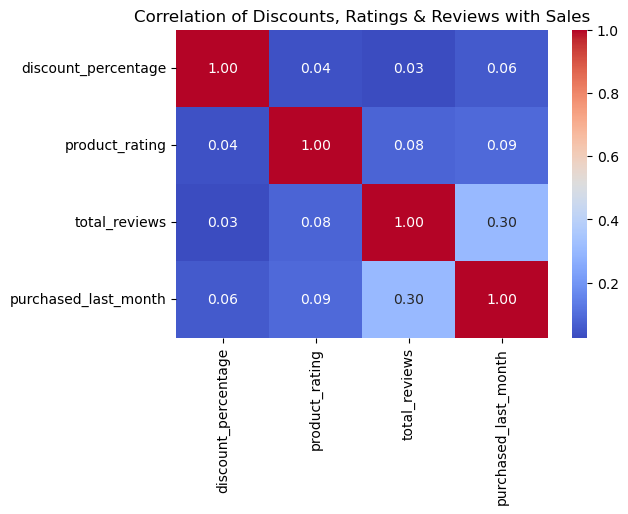

In [23]:
# Step 1: Select relevant columns
cols = ['discount_percentage', 'product_rating', 'total_reviews', 'purchased_last_month']

# Step 2: Convert to numeric
for c in cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce').fillna(0)

# Step 3: Compute correlation matrix
corr = df[cols].corr()

# Step 4: Print correlation
print("Correlation between discounts, reviews, ratings, and sales:\n")
print(corr['purchased_last_month'].sort_values(ascending=False))

# Step 5: Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Discounts, Ratings & Reviews with Sales")
plt.show()

##### ------Results ----
##### From this, I can see which factors (discounts, ratings, or reviews) 
##### have the strongest relationship with product sales.
##### This helps me answer whether customers buy more because of bigger discounts, 
##### or because the product has strong ratings and many reviews.
##### The insight is useful for deciding whether to focus more on price promotions 
##### or on building customer trust through reviews and ratings.

### Q7 — Seasonal trends: which months show spikes in sales for top categories?
**Importance:** Plan season-specific inventory and promotions.

##### ---- Remarks on Q7: Sales Seasonal Trends ---- 
##### First, I confirm that the 'purchased_last_month' field contains a number.
##### In step two, I format the 'data_collected_at' column using the correct date and time.
##### Step 3: I take the month from this date and make a new column called '_month'.
##### Step 4: I aggregate the data by month and product category, 
##### and then total the purchases for every pair of categories and months.
##### Step 5: To make it easier to see monthly sales patterns by category, I restructure the data.

In [24]:
if 'data_collected_at' in df.columns and 'product_category' in df.columns and 'purchased_last_month' in df.columns:
    df['purchased_last_month'] = pd.to_numeric(df['purchased_last_month'], errors='coerce').fillna(0)
    df['_tmp_date'] = pd.to_datetime(df['data_collected_at'], errors='coerce')
    df['_month'] = df['_tmp_date'].dt.to_period('M')
    q7 = df.groupby(['product_category','_month'])['purchased_last_month'].sum().unstack(fill_value=0)
    display(q7.head())
else:
    print('Required columns missing.')

_month,2025-08
product_category,
Cameras,835300
Chargers & Cables,822150
Gaming,123500
Headphones,229550
Laptops,3416450


##### --- Results ----
##### This demonstrates to me how sales of various product categories fluctuate month over month..
##### I can spot which categories have strong seasonal spikes 
##### (for example, products that sell more during holidays or specific months).
##### These insights help in planning inventory, seasonal promotions, 
##### and marketing campaigns at the right time.

## Final Discussion and Conclusion

- **Strengths:** The dataset offers a comprehensive insight into how Amazon products perform. It contains information on prices, discounts, ratings, reviews, and categories, enabling us to pinpoint the best-selling products, analyze the impact of discounts on sales, and comprehend how ratings and reviews contribute to establishing trust.
- **Limitations:** There are some gaps in the data. Lacking transaction IDs limits our ability to comprehensively analyze the products that are bought together. The time information is restricted to collection dates, which means we lack insights into daily or weekly shopping trends. The absence of seller or brand details hinders us from gaining deeper insights at the seller level.
- **Recommendations:** •	Here are some useful suggestions and concentrate on based on my analysis.
•	Since the most income is generated from best-selling or highest-rated product categories, need to work harder to promote them.
•	There is need to run ads during the busiest shopping hours because timing is everything.
•	Discounts can be very effective, particularly to draw customers to new or underutilized products.
•	In order to sustain consistent sales for the established product lines, I would mainly rely on customer ratings and reviews.
•	I would focus customers to provide more reviews and comments on their purchases in order to foster trust.
•	Above all, maintaining a high standard of customer service and product quality is essential to gaining devoted clients over time.
